In [1]:
#IMPORTING THE DEPENDENCIES 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import func, inspect
from sqlalchemy.orm import join

In [20]:
# ATTACHING THE DATA SETS
artist_file = 'Resources/Artist_2.csv'
album_file = 'Resources/albumlist.csv'
artist_full_file = 'Resources/artist_full.csv'


artist_df = pd.read_csv(artist_file)
album_df = pd.read_csv(album_file)
artist_full_df = pd.read_csv(artist_full_file)

In [19]:
#! pip install psycopg2

# Artist W/ the Most Top Albums

In [21]:
#ARTISTS W/ THE MOST TOP ALBUMS
top_artist_df = artist_df.groupby(artist_df['Artist'])

band_name = top_artist_df['Artist'].unique()

album_count = top_artist_df['Artist'].count()

top_dict = {'Artist': band_name,
           'Number of Top Albums' : album_count}
top_df = pd.DataFrame.from_dict(top_dict)
top_df = top_df.set_index('Artist')
top_df = top_df.sort_values('Number of Top Albums', ascending=False)

top_df.head(10)

,Number of Top Albums
Artist,
[The Beatles],10
[Bob Dylan],10
[The Rolling Stones],10
[Bruce Springsteen],8
[The Who],7
[Radiohead],5
[U2],5
[Led Zeppelin],5
[Elton John],5


In [5]:
import psycopg2
#CONNECTING TO THE DATA 
connection_string = "postgres@localhost/music_db"
engine = create_engine(f'postgresql+psycopg2://{connection_string}')

In [6]:
engine.table_names()

['genre', 'subgenre', 'year', 'artist', 'album', 'artist_full']

In [7]:
Base = automap_base()
Base.prepare(engine, reflect = True)
Base.classes.keys()
session = Session(bind=engine)

# Creating the artist df
artist = Base.classes.artist
artist_query = session.query(artist.id, artist.artist, artist.genre)
artist_df2 = pd.DataFrame(artist_query, columns = ['id', 'artist', 'genre'])
artist_df2.set_index('id', inplace= True)
artist_df2.head()

#Creating the album df
album = Base.classes.album
album_query = session.query(album.id, album.album, album.year)
album_df2 = pd.DataFrame(album_query, columns = ['id', 'album', 'year'])
album_df2.set_index('id', inplace= True)
album_df2.head()

full = Base.classes.artist_full
full_query = session.query(full.id, full.artist, full.album, full.genre, full.year) 
full_df2 = pd.DataFrame(full_query, columns = ['id', 'artist', 'album', 'genre', 'year'])
full_df2.set_index('id', inplace= True)
full_df2.head()




,artist,album,genre,year
id,,,,
1,The Beatles,Sgt. Pepper's Lonely Hearts Club Band,Rock,1967
2,The Beach Boys,Pet Sounds,Rock,1966
3,The Beatles,Revolver,Rock,1966
4,Bob Dylan,Highway 61 Revisited,Rock,1965
5,The Beatles,Rubber Soul,"Rock, Pop",1965


# Creating the Rock, Hip Hop and Country Data Frames

In [16]:
#Rock DF Query
rock_query = session.query(full.id, full.artist, full.album, full.genre, full.year).filter(full.genre.match('%Rock%'))
rock_query_df = pd.DataFrame(rock_query, columns = ['id', 'artist', 'album', 'genre', 'year'])
rock_query_df.set_index('id', inplace = True)
rock_query_df.head()

,artist,album,genre,year
id,,,,
1,The Beatles,Sgt. Pepper's Lonely Hearts Club Band,Rock,1967
2,The Beach Boys,Pet Sounds,Rock,1966
3,The Beatles,Revolver,Rock,1966
4,Bob Dylan,Highway 61 Revisited,Rock,1965
5,The Beatles,Rubber Soul,"Rock, Pop",1965


In [13]:
#Rap DF Query
rap_query = session.query(full.id, full.artist, full.album, full.genre, full.year).filter(full.genre.match('%Hip%'))
rap_query_df = pd.DataFrame(rap_query, columns = ['id', 'artist', 'album', 'genre', 'year'])
rap_query_df.set_index('id', inplace = True)
rap_query_df.head()

,artist,album,genre,year
id,,,,
48,Public Enemy,It Takes a Nation of Millions to Hold Us Back,Hip Hop,1988
118,Kanye West,Late Registration,Hip Hop,2005
123,Run D.M.C.,Raising Hell,Hip Hop,1986
134,The Notorious B.I.G.,Ready to Die,Hip Hop,1994
138,Dr. Dre,The Chronic,Hip Hop,1992


In [22]:
#Country DF Query
country_query = session.query(full.id, full.artist, full.album, full.genre, full.year).filter(full.genre.match('%Country%')).all()
country_query_df = pd.DataFrame(country_query, columns = ['id', 'artist', 'album', 'genre', 'year'])
country_query_df.set_index('id', inplace = True)
country_query_df.head(10)

,artist,album,genre,year
id,,,,
19,Van Morrison,Astral Weeks,"Jazz, Rock, Blues, Folk, World, & Country",1968
31,Bob Dylan,Bringing It All Back Home,"Rock, Folk, World, & Country",1965
38,Muddy Waters,The Anthology,"Folk, World, & Country",2001
66,Van Morrison,Moondance,"Jazz, Rock, Funk / Soul, Folk, World, & Country",1970
71,Paul Simon,Graceland,"Jazz, Rock, Funk / Soul, Pop, Folk, World, & C...",1986
88,Johnny Cash,At Folsom Prison,"Folk, World, & Country",1968
94,Hank Williams,40 Greatest Hits,"Folk, World, & Country",1984
97,Bob Dylan,The Freewheelin' Bob Dylan,"Folk, World, & Country",1963
105,Ray Charles,Modern Sounds in Country and Western Music,"Funk / Soul, Folk, World, & Country",1962


# Graphs to Analyze Trends

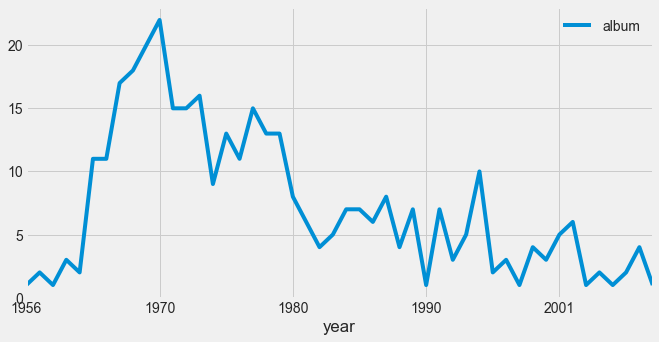

In [50]:
# The Style
plt.style.use('fivethirtyeight')

# The Rock Plot
rock_plot = rock_query_df.groupby('year')['album'].count()
rock_plot_df = pd.DataFrame(rock_plot)

rock_plot_df.head(10)

fig, ax = plt.subplots(figsize = (10, 5));
rock_plot_df.plot(ax = ax, x_compat = True)

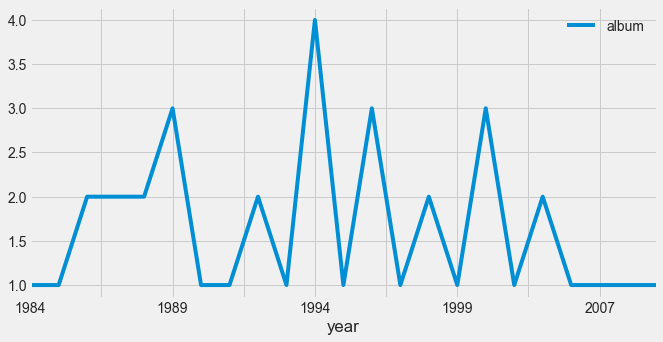

In [52]:
# Creating the Hip Hop Graph
rap_plot = rap_query_df.groupby('year')['album'].count()
rap_plot_df = pd.DataFrame(rap_plot)
fig, ax = plt.subplots(figsize = (10, 5));
rap_plot_df.plot(ax = ax, x_compat = True)

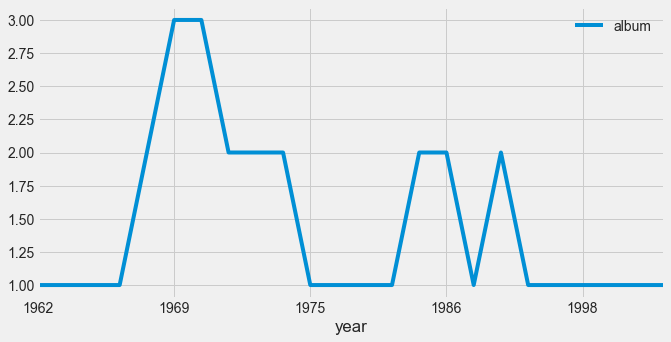

In [53]:
# Creating the Country file 
country_plot = country_query_df.groupby('year')['album'].count()
country_plot_df = pd.DataFrame(country_plot)
fig, ax = plt.subplots(figsize = (10, 5));
country_plot_df.plot(ax = ax, x_compat = True)
